In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
transactions = pd.read_csv('transactions.csv')

In [5]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [6]:
transactions.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Convert Dataframe into List of Lists

l = []
for i in range(1,7500):
    l.append([str(transactions.values[i,j]) for j in range(0,20)])

In [9]:
from apyori import apriori

In [10]:
association_rules = apriori(l,min_support = 0.003, min_confidence = 0.20, min_lift = 3, min_length = 2)

In [11]:
association_rules = list(association_rules)

In [12]:
pd.DataFrame(association_rules).head(10)

,items,support,ordered_statistics
0,"(light cream, chicken)",0.004534,"[((light cream), (chicken), 0.2905982905982905..."
1,"(escalope, mushroom cream sauce)",0.005734,"[((mushroom cream sauce), (escalope), 0.300699..."
2,"(pasta, escalope)",0.005867,"[((pasta), (escalope), 0.37288135593220345, 4...."
3,"(fromage blanc, honey)",0.003334,"[((fromage blanc), (honey), 0.2450980392156863..."
4,"(herb & pepper, ground beef)",0.016002,"[((herb & pepper), (ground beef), 0.3234501347..."
5,"(ground beef, tomato sauce)",0.005334,"[((tomato sauce), (ground beef), 0.37735849056..."
6,"(light cream, olive oil)",0.003200,"[((light cream), (olive oil), 0.20512820512820..."
7,"(olive oil, whole wheat pasta)",0.008001,"[((whole wheat pasta), (olive oil), 0.27149321..."
8,"(shrimp, pasta)",0.005067,"[((pasta), (shrimp), 0.3220338983050848, 4.513..."
9,"(avocado, milk, spaghetti)",0.003334,"[((avocado, spaghetti), (milk), 0.416666666666..."


In [13]:
association_rules[0:5]

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004533937858381117, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.842659069325735)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005734097879717296, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7898219427631195)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005867448993199093, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.37288135593220345, lift=4.6995584674547795)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.0033337778370449394, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confid

In [14]:
len(association_rules)

158

In [15]:
from mlxtend.preprocessing import TransactionEncoder

In [20]:
encoder = TransactionEncoder().fit(l)

In [21]:
onehot = encoder.transform(l)

In [30]:
transact_onehot = pd.DataFrame(onehot, columns=encoder.columns_).drop('nan',axis = 1)

In [31]:
transact_onehot.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [32]:
from mlxtend.frequent_patterns import apriori

In [33]:
freq_itemsets = apriori(transact_onehot, min_support=0.05, max_len=3, use_colnames=True)

In [34]:
freq_itemsets.head()

,support,itemsets
0,0.087078,(burgers)
1,0.081077,(cake)
2,0.060008,(chicken)
3,0.163889,(chocolate)
4,0.080411,(cookies)


In [35]:
freq_itemsets.sort_values(by="support", ascending=False).head(20)

,support,itemsets
16,0.238298,(mineral water)
6,0.179624,(eggs)
21,0.174157,(spaghetti)
8,0.170956,(french fries)
3,0.163889,(chocolate)
12,0.132018,(green tea)
15,0.129617,(milk)
13,0.098280,(ground beef)
10,0.095346,(frozen vegetables)
18,0.095079,(pancakes)


In [37]:
from mlxtend.frequent_patterns import association_rules

In [38]:
assoc_rules = association_rules(freq_itemsets, metric = "lift", min_threshold = 1)

In [39]:
assoc_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(chocolate),0.238298,0.163889,0.052674,0.221041,1.348727,0.013619,1.073370,0.339451
1,(chocolate),(mineral water),0.163889,0.238298,0.052674,0.321400,1.348727,0.013619,1.122459,0.309241
2,(eggs),(mineral water),0.179624,0.238298,0.050940,0.283593,1.190076,0.008136,1.063225,0.194688
3,(mineral water),(eggs),0.238298,0.179624,0.050940,0.213766,1.190076,0.008136,1.043425,0.209685
4,(mineral water),(spaghetti),0.238298,0.174157,0.059741,0.250699,1.439507,0.018240,1.102153,0.400836


In [40]:
# Association Rule - antecedents and consequents
# {health} --> {Cooking}

# Multiple antecedents rule
# {humor, travel} --> {language}

# Multiple consequents rule
# {biography} ----> {history,language}

# Multiple antecedents and consequents rule
# {bigraphy, nonfiction} ---> {history, language}

assoc_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(chocolate),0.238298,0.163889,0.052674,0.221041,1.348727,0.013619,1.073370,0.339451
1,(chocolate),(mineral water),0.163889,0.238298,0.052674,0.321400,1.348727,0.013619,1.122459,0.309241
2,(eggs),(mineral water),0.179624,0.238298,0.050940,0.283593,1.190076,0.008136,1.063225,0.194688
3,(mineral water),(eggs),0.238298,0.179624,0.050940,0.213766,1.190076,0.008136,1.043425,0.209685
4,(mineral water),(spaghetti),0.238298,0.174157,0.059741,0.250699,1.439507,0.018240,1.102153,0.400836


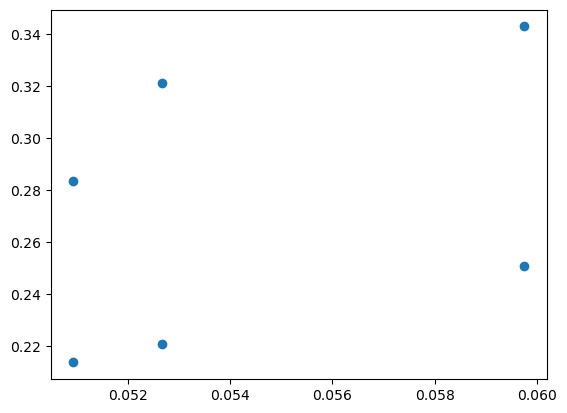

In [42]:
plt.scatter(x = "support", y = "confidence", data = assoc_rules)
plt.show()